### analysis of the political speches dataset. 

##### Dataset from Savoy, J: Lexical Analysis of US Political Speeches. Journal of Quantitative Linguistics 17, issue 2, 123-141, 2010

In [1]:
import pickle

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import ttest_ind    # ttest_ind tests the equality of means
from scipy.stats import chisquare    # chisquare tests the independence of 2 distributions

### political speeches dataset

In [75]:
dfmo = pickle.load(open("/home/xhta/Robot/proj/posp/pj_demo_dfmo_full.20190629_163240.pkl", "rb"))

In [76]:
dfmo.head()

,jahr,leng,datum,speaker,nwords,ntoks,nverbs,npast,npresent,nfuture,...,nffuture,doc,antpast,antpresent,antfuture,antfpast,antfpresent,antffuture,ldeont,lmodal
M0001,0,13646,"April 25, 2007",McCain,2441,385,422,25,155,26,...,22,"""Today, I announce my candidacy for President ...",0.121359,0.752427,0.126214,0.185185,0.733333,0.081481,0.0,1.0
M0002,0,18408,"May 1, 2007",McCain,3095,561,468,42,195,6,...,28,"""Since the dawn of our republic, Americans hav...",0.172840,0.802469,0.024691,0.191558,0.717532,0.090909,0.0,17.0
M0003,0,17136,"May 21, 2007",McCain,2880,460,505,41,152,32,...,38,"""When our founding fathers signed the document...",0.182222,0.675556,0.142222,0.136808,0.739414,0.123779,0.0,2.0
M0004,0,13463,"June 18, 2007",McCain,2428,417,427,160,83,11,...,28,"""Thank you, Admiral Stewart, Secretary Peters,...",0.629921,0.326772,0.043307,0.496575,0.407534,0.095890,0.0,27.0
M0005,0,17063,"June 20, 2007",McCain,2766,451,429,31,174,17,...,38,"""It is pretty difficult for a politician to re...",0.139640,0.783784,0.076577,0.163701,0.701068,0.135231,0.0,13.0


In [77]:
dfmo.columns

Index(['jahr', 'leng', 'datum', 'speaker', 'nwords', 'ntoks', 'nverbs',
       'npast', 'npresent', 'nfuture', 'nfpast', 'nfpresent', 'nffuture',
       'doc', 'antpast', 'antpresent', 'antfuture', 'antfpast', 'antfpresent',
       'antffuture', 'ldeont', 'lmodal'],
      dtype='object')

In [78]:
dfmo.loc["M0005", 'doc'][0:2000]

'"It is pretty difficult for a politician to resist an invitation to speak before a room full of broadcasters - especially during an election campaign. But I am not here to talk about politics but about our neighbors which have been too neglected for too long. We are all of the New World, united by a common history and a common quest for justice and freedom that began with our struggle for independence."Four and a half decades ago, John Kennedy described the people of Latin America as our \'firm and ancient friends, united by history and experience and by our determination to advance the values of American civilization.\' Never was this truer than today. With globalization, our hemisphere has grown closer, more integrated, and more interdependent. Latin America today is increasingly vital to the fortunes of the United States. Americans north and south share a common geography and a common destiny. I would like to share with you today my vision about where our hemisphere is headed, and 

In [79]:
dfmo["speaker"].describe()

count       251
unique        2
top       Obama
freq        155
Name: speaker, dtype: object

In [80]:
dfmo.groupby("speaker").count()

,jahr,leng,datum,nwords,ntoks,nverbs,npast,npresent,nfuture,nfpast,...,nffuture,doc,antpast,antpresent,antfuture,antfpast,antfpresent,antffuture,ldeont,lmodal
speaker,,,,,,,,,,,,,,,,,,,,,
McCain,96,96,96,96,96,96,96,96,96,96,...,96,96,96,96,96,96,96,96,96,96
Obama,155,155,155,155,155,155,155,155,155,155,...,155,155,155,155,155,155,155,155,155,155


In [81]:
dfmo["lmodal"].describe()

count    251.000000
mean       7.326693
std        6.467522
min        0.000000
25%        3.000000
50%        6.000000
75%       10.000000
max       48.000000
Name: lmodal, dtype: float64

In [82]:
dfmo.groupby("speaker").mean()

,jahr,leng,nwords,ntoks,nverbs,npast,npresent,nfuture,nfpast,nfpresent,nffuture,antpast,antpresent,antfuture,antfpast,antfpresent,antffuture,ldeont,lmodal
speaker,,,,,,,,,,,,,,,,,,,
McCain,0.0,12600.781250,2215.093750,368.416667,379.791667,43.635417,133.31250,21.645833,53.562500,174.739583,35.208333,0.209524,0.677362,0.113114,0.199057,0.665530,0.135413,0.0,7.947917
Obama,0.0,15236.522581,2807.477419,465.916129,518.703226,60.761290,191.43871,29.451613,74.154839,244.929032,42.548387,0.216861,0.681271,0.101868,0.207882,0.678454,0.113664,0.0,6.941935


In [83]:
dfmo['lmodal'].groupby(dfmo["speaker"]).mean()

speaker
McCain    7.947917
Obama     6.941935
Name: lmodal, dtype: float64

In [84]:
dfmo['modal_ratio'] = dfmo['lmodal'] / dfmo['nverbs']

In [85]:
dfmo['modal_ratio'].describe()

count    251.000000
mean       0.015547
std        0.011991
min        0.000000
25%        0.007424
50%        0.012500
75%        0.021098
max        0.065574
Name: modal_ratio, dtype: float64

In [86]:
dfmo_McCain = dfmo[ dfmo["speaker"] == 'McCain' ]

In [87]:
dfmo_Obama = dfmo[ dfmo["speaker"] == 'Obama' ]

In [88]:
len(dfmo_Obama), len(dfmo_McCain)

(155, 96)

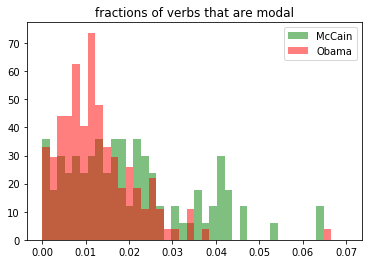

In [89]:
plt.hist(dfmo_McCain['modal_ratio'], bins = 40, alpha = 0.5, label = "McCain",  range = (0,0.07), color = 'g', density = 1)
plt.hist(dfmo_Obama['modal_ratio'], bins = 40, alpha = 0.5, label = "Obama",  range = (0,0.07), color = 'r', density = 1)
plt.title('fractions of verbs that are modal')
plt.legend(loc='best')
plt.show()

In [90]:
from scipy.stats import ttest_ind, chisquare

##### excerpt from scipy.stats.ttest_ind :

We can use this test, if we observe two independent samples from the same or different population .... 
The test measures wther the average (expected) value differs significantly across samples. 
If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of 
identical average. If the p-value is smaller than the threshold, e.g. 1% , r% or 10%, then we reject the null 
hypothesis of equal averages. The two samples does not need to have the same length.

##### excerpt from scipy.chisquare1:
Tests the null hypothesis that the categorical data has the given frequencies. (f_obs, f_exp, ddof = 0, axis = 0)
The p-value is computed using a chi-squared distribution with k - 1- ddof degrees of freedom, where k = the number of observed frequencies.

In [112]:
# past tense   vs   present tense    all speakers
ttest_ind(dfmo['antpast'], dfmo['antpresent'], equal_var=False, nan_policy='omit')
# results show strongly significant difference between past tense usage and present tense usage

Ttest_indResult(statistic=-57.09492905140832, pvalue=1.2021268647135612e-218)

In [113]:
# present tense   vs   future tense    all speakers
ttest_ind(dfmo['antpresent'], dfmo['antfuture'], equal_var=False, nan_policy='omit')
# results show strongly significant difference between present tense usage and future tense usage

Ttest_indResult(statistic=90.73799544999683, pvalue=1.6028586258298012e-279)

In [120]:
# POS tagging vs LIWC   past     both speakers
ttest_ind(dfmo['antpast'], dfmo['antfpast'], equal_var=False, nan_policy='omit')
# result indicates equal means found by POS tagging and LIWC

Ttest_indResult(statistic=1.2045528280701834, pvalue=0.22897120869447626)

In [121]:
# POS tagging vs LIWC   present     both speakers
ttest_ind(dfmo['antpresent'], dfmo['antfpresent'], equal_var=False, nan_policy='omit')
# result indicates equal means found by POS tagging and LIWC

Ttest_indResult(statistic=0.9134598376970914, pvalue=0.36146064662445687)

In [122]:
# POS tagging vs LIWC   future    both speakers
ttest_ind(dfmo['antfuture'], dfmo['antffuture'], equal_var=False, nan_policy='omit')
# result indicates equal means found by POS tagging and LIWC

Ttest_indResult(statistic=-3.5484293598562964, pvalue=0.0004249840569410666)

In [91]:
# Obama vs McCain  usage of modal (would , could, might)
ttest_ind(dfmo_Obama['modal_ratio'], dfmo_McCain['modal_ratio'], equal_var = False, nan_policy='omit')
# test statistics and p value indicate than the mean modal_ratio is significantly different in McCain's political speeches
# vs Obama's speeches

Ttest_indResult(statistic=-4.56032283856477, pvalue=1.0999375088641693e-05)

In [92]:
# past tense   Obama vs McCain
ttest_ind(dfmo_Obama['antpast'], dfmo_McCain['antpast'], equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=0.5124305273839909, pvalue=0.6091905680757264)

In [93]:
# present tense   Obama vs McCain
ttest_ind(dfmo_Obama['antpresent'], dfmo_McCain['antpresent'], equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=0.31705187375818283, pvalue=0.7516874694842609)

In [94]:
# future tense   Obama vs McCain
ttest_ind(dfmo_Obama['antfuture'], dfmo_McCain['antfuture'], equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=-1.50044661478685, pvalue=0.13552777192035292)

In [124]:
spas = dfmo[ 'npast'].sum()
sprs = dfmo[ 'npresent'].sum()
sfus = dfmo[ 'nfuture'].sum()

sAvepast, sAvepresent, sAvefuture = [spas, sprs, sfus]/(spas + sprs + sfus)

lpas = dfmo[ 'nfpast'].sum()
lprs = dfmo[ 'nfpresent'].sum()
lfus = dfmo[ 'nffuture'].sum()

lAvepast, lAvepresent, lAvefuture = [lpas, lprs, lfus]/(lpas + lprs + lfus)

In [125]:
print("political speeches, both speakers POS ", sAvepast, sAvepresent, sAvefuture)

political speeches, both speakers POS  0.2169448828940865 0.6771416272061989 0.10591348989971461


In [126]:
chisquare([22, 68, 10], [33, 33, 34])
# test result indicates POS past/present/future tenses distribution not random

Power_divergenceResult(statistic=57.72905525846703, pvalue=2.9126944473126836e-13)

In [128]:
print("political speeches, both speakers LIWC ", lAvepast, lAvepresent, lAvefuture)

political speeches, both speakers LIWC  0.20449907805777504 0.6728826060233559 0.12261831591886908


In [129]:
chisquare([20, 67, 13], [33, 33, 34])
# test result indicates LIWC past/present/future focus distribution not random

Power_divergenceResult(statistic=53.12210338680927, pvalue=2.9152903563929526e-12)

In [117]:
opas = dfmo.loc[ dfmo['speaker'] == 'Obama', 'npast'].sum()
oprs = dfmo.loc[ dfmo['speaker'] == 'Obama', 'npresent'].sum()
ofus = dfmo.loc[ dfmo['speaker'] == 'Obama', 'nfuture'].sum()

oAvepast, oAvepresent, oAvefuture = [opas, oprs, ofus]/(opas + oprs + ofus)

mpas = dfmo.loc[ dfmo['speaker'] == 'McCain', 'npast'].sum()
mprs = dfmo.loc[ dfmo['speaker'] == 'McCain', 'npresent'].sum()
mfus = dfmo.loc[ dfmo['speaker'] == 'McCain', 'nfuture'].sum()

mAvepast, mAvepresent, mAvefuture = [mpas, mprs, mfus]/(mpas + mprs + mfus)

In [118]:
print("POS tagging\nMcCain:", mAvepast, mAvepresent, mAvefuture, "\nObama:", oAvepast, oAvepresent, oAvefuture)

POS tagging
McCain: 0.21972200367164962 0.6712824547600315 0.10899554156831891 
Obama: 0.21573208722741433 0.6797003848268279 0.10456752794575774


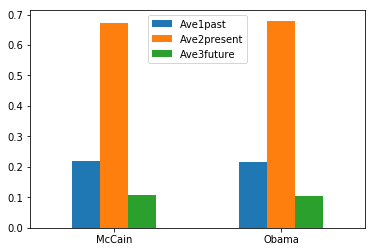

In [130]:
modtplot = pd.DataFrame({'Ave1past':[mAvepast, oAvepast], 'Ave2present': [mAvepresent, oAvepresent], 'Ave3future':[mAvefuture, oAvefuture]}, index = ['McCain', 'Obama'])
modtplot.plot.bar(rot = 0, sort_columns=False)
plt.show()

In [119]:
# McCain, POS tagging, i.e. antpast, antpresent, antfuture,  chisquare : observed vs expected
chisquare([22, 67, 11], [33, 33, 34])
# the p-value indicates that the observed distribution is not uniform, i.e. McCain uses past present and future tenses \
# deliberately, not equally likely   .... 1 - scipy.stats.chi2.cdf(57.0436, 2 ) = 4.1033e-13 = chisqprob (57.0436, 2) (old version of python)

Power_divergenceResult(statistic=54.255793226381456, pvalue=1.6538807610477217e-12)

In [108]:
# Obama, POS tagging, i.e. antpast, antpresent, antfuture,  chisquare : observed vs expected
chisquare([22, 68, 10], [33, 33, 34])
# the p-value indicates that the observed distribution is not uniform, i.e. Obama uses past present and future tenses
# deliberately, not equally likely

Power_divergenceResult(statistic=57.72905525846703, pvalue=2.9126944473126836e-13)

In [114]:
ofpas = dfmo.loc[ dfmo['speaker'] == 'Obama', 'nfpast'].sum()
ofprs = dfmo.loc[ dfmo['speaker'] == 'Obama', 'nfpresent'].sum()
offus = dfmo.loc[ dfmo['speaker'] == 'Obama', 'nffuture'].sum()
oAvefpast, oAvefpresent, oAveffuture = [ofpas, ofprs, offus] / (ofpas + ofprs + offus)

mfpas = dfmo.loc[ dfmo['speaker'] == 'McCain', 'nfpast'].sum()
mfprs = dfmo.loc[ dfmo['speaker'] == 'McCain', 'nfpresent'].sum()
mffus = dfmo.loc[ dfmo['speaker'] == 'McCain', 'nffuture'].sum()
mAvefpast, mAvefpresent, mAveffuture = [mfpas, mfprs, mffus] / (mfpas + mfprs + mffus)

In [115]:
print("LIWC\nMcCain:", mAvefpast, mAvefpresent, mAveffuture, "\nObama:", oAvefpast, oAvefpresent, oAveffuture)

LIWC
McCain: 0.20326520931335731 0.6631221093410286 0.1336126813456141 
Obama: 0.20505592920985496 0.677287567123972 0.11765650366617308


In [116]:
# McCain, LIWC, i.e. antfpast,antfpresent, antffuture,  chisquare : observed vs expected
chisquare([20, 66, 14], [33, 33, 34])
# the p-value indicates that the observed distribution is not uniform, i.e. McCain uses past present and future focus
# deliberately, not equally likely

Power_divergenceResult(statistic=49.88591800356507, pvalue=1.4703155257890662e-11)

In [ ]:
# see 2 more plots in doposp.ipynb